# Fraudulent Financial Transaction Classifier

Problems, questions and data from UNSW Inter-Uni Datathon 2024. 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

from sklearn.preprocessing import LabelEncoder

### Part 1: Exploratory Data Analysis

In [4]:
df = pd.read_csv('dataset/train.csv')
df.head()

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,MerchantID,TransactionType,TransactionLocation,DeviceType,Latitude,Longitude,EmailDomain,Terrorism,UserTenure,IsFraud
0,8765,70,37,Female,Professional,Bachelor,Widowed,3,28884.43 AUD,14610.61 AUD,...,M006,Withdrawal,Adelaide,Mobile,-31.840233,145.612793,jon44@disposable.com,False,113,1
1,9645,3386,34,Male,Student,High School,Married,4,AU$ 54919.07,39169.49 AUD,...,M002,Withdrawal,Canberra,Mobile,-37.020100,144.964600,emilyreese@gmail.com,False,104,1
2,1145,2971,25,Male,Unemployed,Master,Married,2,AU$ 74728.57,55873.76 AUD,...,M008,Purchase,Brisbane,Mobile,-31.840233,145.612793,fordevan@gmail.com,False,105,0
3,15308,2925,25,Male,Professional,High School,Married,3,AU$ 55712.62,AED 89649.04,...,M001,Purchase,Darwin,iphone 15,-37.020100,144.964600,kathleenlewis@tempmail.com,False,70,1
4,14967,2339,38,Male,Professional,High School,Single,4,53004.7 AUD,AED 43601.02,...,M001,Withdrawal,MLB,Tablet,-37.020100,144.964600,kristinawhite@gmail.com,False,27,0


In [5]:
# Get info on all columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10966 entries, 0 to 10965
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionNumber    10966 non-null  int64  
 1   UserID               10966 non-null  int64  
 2   Age                  10966 non-null  int64  
 3   Gender               10966 non-null  object 
 4   Occupation           10966 non-null  object 
 5   EducationLevel       10966 non-null  object 
 6   MaritalStatus        10966 non-null  object 
 7   NumDependents        10966 non-null  int64  
 8   Income               10966 non-null  object 
 9   Expenditure          10966 non-null  object 
 10  GiftsTransaction     10966 non-null  object 
 11  TransactionDate      10966 non-null  object 
 12  TransactionTime      10966 non-null  object 
 13  TransactionAmount    10966 non-null  object 
 14  MerchantID           10966 non-null  object 
 15  TransactionType      10966 non-null 

In [6]:
# Check transaction numbers are unique - 10,966 entries = 10,966 Transaction Numbers
print(df['TransactionNumber'].nunique())

# Check number of users
print(df['UserID'].nunique())


10966
4423


In [7]:
# checking for null data
df_nulls = df[df.isna().any(axis=1)]
df_nulls.head()

# POINT OF IMPROVEMENT - Dropping 43 rows with all values except latitude/longitude. Can data be imputed instead?


,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,MerchantID,TransactionType,TransactionLocation,DeviceType,Latitude,Longitude,EmailDomain,Terrorism,UserTenure,IsFraud
478,1050,4636,40000,Male,Professional,High School,Married,2,AU$ 149658.37,AU$ 81487.38,...,M007,Purchase,Brisbane,Mobile,NaN,NaN,elizabethcastro@securemail.com,True,44,0
573,265,4883,39,isnotfemale,Unemployed,Bachelor,Widowed,1,34958.18 AUD,25789.2 AUD,...,M007,Withdrawal,Canberra,Mobile,NaN,NaN,jjohnson@gmail.com,False,73,1
669,16997,2646,39,Male,Retired,Bachelor,Married,2,41944.5 AUD,79750.47 AED,...,M004,Purchase,Canberra,Desktop,NaN,NaN,jacqueline57@disposable.com,True,32,0
967,10368,4636,40,Male,Professional,High School,Married,2,149658.37 AUD,AU$ 81487.38,...,M002,Purchase,Melbourne,Mobile,NaN,NaN,elizabethcastro@securemail.com,True,44,0
1351,12428,934,44,Male,Professional,Bachelor,Married,1,AU$ 77543.56,AU$ 58913.12,...,M005,Purchase,Darwin,mob,NaN,NaN,christopherhamilton@outlook.com,True,97,0


In [8]:
# drop null data since there are only 43
df = df.dropna()
df.shape

(10923, 24)

In [9]:
df['Age'].describe()

count    10923.000000
mean      2748.755928
std       9725.332418
min        -68.000000
25%         26.000000
50%         34.000000
75%         43.000000
max      67000.000000
Name: Age, dtype: float64

In [10]:
# Group by 'UserID' and aggregate 'Age'
age_table = df.groupby('UserID')['Age'].agg(list)

print(age_table[:20])

UserID
1                      [18]
2                  [39, 39]
3      [21, 21, 21, 21, 21]
4                  [23, 23]
5                  [43, 43]
6              [41, 41, 41]
7     [33, -33, 33, 33, 33]
8                      [21]
9       [25, 25000, 25, 25]
10          [32, 32000, 32]
11             [37000, -37]
12           [35000, 35000]
13             [27, 27, 27]
14             [33, 33, 33]
15                 [32, 32]
16    [38, 38, -38, 38, 38]
17                     [39]
18                     [18]
19                     [42]
20            [31, -31, 31]
Name: Age, dtype: object


Note that ages are sometimes negative or in the ten thousands. For example: UserIDs 7, 9, 10 etc. 

It makes sense that ages in the ten-thousands and negatives are errors and need to be imputed.

<Axes: xlabel='Age', ylabel='Count'>

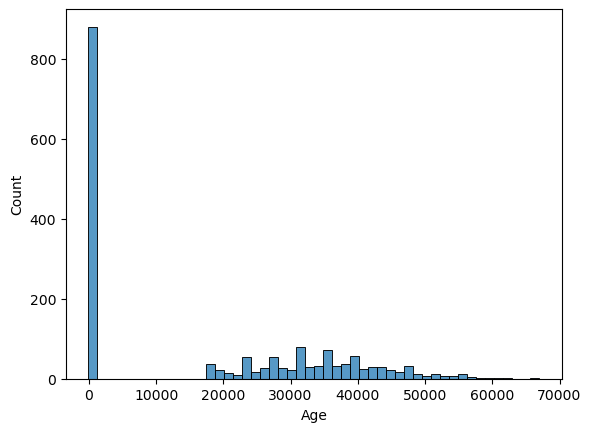

In [11]:
# check outliers
age_outliers = df[(df['Age'] < 0) | (df['Age'] > 150)]

# Plot the histogram for these ages
sns.histplot(age_outliers['Age'], bins=50)

In [12]:
# check number of Ages under 17 and ages over 150
print(df.shape[0])
print("Ages over 150:", df[df["Age"] > 150].shape[0])
print("Ages under 17:", df[df["Age"] < 17].shape[0])
print("Ages between 150 to 10,000:", df[(df['Age'] >= 150) & (df['Age'] <= 10000)].shape[0]) 


10923
Ages over 150: 854
Ages under 17: 881
Ages between 150 to 10,000: 0


In [13]:
df['Age'] = df['Age'].abs() # df is now all positive
df.loc[df['Age'] > 150, 'Age'] = df['Age'] / 1000 # all df ages over 150 divided by 1000 
df["Age"].describe()

count    10923.000000
mean        34.700723
std          9.670968
min         18.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         68.000000
Name: Age, dtype: float64

In [14]:
df['Gender'].unique()

array(['Female', 'Male', 'he', 'isnotfemale', 'fem', 'she', 'man',
       'woman', 'isnotmale'], dtype=object)

In [15]:
# Define dictionary for standardizing gender values

gender_map = {
    'Male': 'Male', 'he': 'Male', 'isnotfemale': 'Male', 'man': 'Male',
    'Female': 'Female', 'fem': 'Female', 'she': 'Female', 'woman': 'Female', 'isnotmale': 'Female'
}

df['Gender'] = df['Gender'].replace(gender_map)
print(df['Gender'].unique())


['Female' 'Male']


In [16]:
gender_encoded =  pd.get_dummies(df[['Gender']], dtype = int)
df = df.join(gender_encoded)
df = df.drop(columns = 'Gender')

In [17]:
# Occupation
# Onehot encoding
code_occupation = pd.get_dummies(df[["Occupation"]], dtype = int, drop_first = False)
df = df.join([code_occupation])
df = df.drop(columns = "Occupation").reset_index(drop = True)

In [18]:
label_encoder = LabelEncoder()

# Fit and transform the 'EducationLevel' column
df['EducationLevel'] = LabelEncoder().fit_transform(df['EducationLevel'])

print(df[['EducationLevel']].head())


   EducationLevel
0               0
1               1
2               2
3               1
4               1


In [19]:
# Marital Status
# Onehot encoding
code_marital_status = pd.get_dummies(df[["MaritalStatus"]], dtype = int, drop_first = False)
df = df.join([code_marital_status])
df = df.drop(columns = "MaritalStatus").reset_index(drop = True)

In [20]:
# Income, Expenditure, GiftTransaction, Transaction Amount
df[["Income", "Expenditure", "GiftsTransaction", "TransactionAmount"]].head(10)

,Income,Expenditure,GiftsTransaction,TransactionAmount
0,28884.43 AUD,14610.61 AUD,£ 1050.01,AU$ 258.14
1,AU$ 54919.07,39169.49 AUD,£ 4969.71,34.94 AUD
2,AU$ 74728.57,55873.76 AUD,£ 1149.85,AU$ 323.82
3,AU$ 55712.62,AED 89649.04,AU$ 4335.7,AED 32.49
4,53004.7 AUD,AED 43601.02,4763.48 AUD,1140.75 AED
5,101381.56 AUD,AED 81036.3,196.29 AUD,67.39 AED
6,AU$ 63035.98,91610.14 AED,3009.44 AUD,899.6 AED
7,AU$ 61284.85,AU$ 36604.93,1214.27 GBP,19.41 AUD
8,AU$ 28419.25,AU$ 11172.93,600.92 GBP,AU$ 111.73
9,57384.51 AUD,AU$ 40721.71,10819.52 GBP,110.54 AUD


In [21]:

# GiftsTransaction
df[['first_value', 'second_value']] = df["GiftsTransaction"].str.split(' ', expand=True)
    
df["first_value_len"] = df["first_value"].apply(lambda s:len(s))
df["second_value_len"] = df["second_value"].apply(lambda s:len(s))
    
    # function to get monetary symbol
def get_monetary_symbol(row):
    if row['first_value_len'] == 1:
        return row['first_value']
    elif row['first_value'] == "AU$":
        return row['first_value']
    elif row['first_value'] == "AED":
        return row['first_value']
    elif row['second_value'] == "GBP":
        return row['second_value']
    elif row['second_value'] == "AUD":
        return row['second_value']
    else:
        return None
    
df["monetary_symbol"] = df.apply(get_monetary_symbol, axis=1)
    
    # function to get monetary value
def get_monetary_value(row):
    if row['first_value'] == row["monetary_symbol"]:
        return row['second_value']
    else:
        return row['first_value']
            
df["monetary_value"] = df.apply(get_monetary_value, axis=1)

df["monetary_value"] = df["monetary_value"].astype("float")
    
    # function to convert to AUD
def get_exchange_rate(row):
    if row['monetary_symbol'] == "£":
        return 1.96
    elif row['monetary_symbol'] == "GBP":
        return 1.96
    elif row['monetary_symbol'] == "AED":
        return 0.41
    else:
        return 1
    
df["exchange_rate"] = df.apply(get_exchange_rate, axis=1)
    
df["GiftsTransaction_AUD_equivalent"] = df["exchange_rate"]*df["monetary_value"]
    
df = df.drop(columns = ["first_value_len", "second_value_len", 'first_value', 'second_value', "exchange_rate", "monetary_symbol","monetary_value"]).reset_index(drop = True)

In [22]:
# Income
df[['first_value', 'second_value']] = df["Income"].str.split(' ', expand=True)
    
df["first_value_len"] = df["first_value"].apply(lambda s:len(s))
df["second_value_len"] = df["second_value"].apply(lambda s:len(s))
    
    # function to get monetary symbol
def get_monetary_symbol(row):
    if row['first_value_len'] == 1:
        return row['first_value']
    elif row['first_value'] == "AU$":
        return row['first_value']
    elif row['first_value'] == "AED":
        return row['first_value']
    elif row['second_value'] == "GBP":
        return row['second_value']
    elif row['second_value'] == "AUD":
        return row['second_value']
    else:
        return None
    
df["monetary_symbol"] = df.apply(get_monetary_symbol, axis=1)
    
    # function to get monetary value
def get_monetary_value(row):
    if row['first_value'] == row["monetary_symbol"]:
        return row['second_value']
    else:
        return row['first_value']
            
df["monetary_value"] = df.apply(get_monetary_value, axis=1)

df["monetary_value"] = df["monetary_value"].astype("float")
    
    # function to convert to AUD
def get_exchange_rate(row):
    if row['monetary_symbol'] == "£":
        return 1.96
    elif row['monetary_symbol'] == "GBP":
        return 1.96
    elif row['monetary_symbol'] == "AED":
        return 0.41
    else:
        return 1
    
df["exchange_rate"] = df.apply(get_exchange_rate, axis=1)
    
df["Income_AUD_equivalent"] = df["exchange_rate"]*df["monetary_value"]
    
df = df.drop(columns = ["first_value_len", "second_value_len", 'first_value', 'second_value', "exchange_rate", "monetary_symbol","monetary_value"]).reset_index(drop = True)

In [23]:
# Expenditure
df[['first_value', 'second_value']] = df["Expenditure"].str.split(' ', expand=True)
    
df["first_value_len"] = df["first_value"].apply(lambda s:len(s))
df["second_value_len"] = df["second_value"].apply(lambda s:len(s))
    
    # function to get monetary symbol
def get_monetary_symbol(row):
    if row['first_value_len'] == 1:
        return row['first_value']
    elif row['first_value'] == "AU$":
        return row['first_value']
    elif row['first_value'] == "AED":
        return row['first_value']
    elif row['second_value'] == "GBP":
        return row['second_value']
    elif row['second_value'] == "AUD":
        return row['second_value']
    else:
        return None
    
df["monetary_symbol"] = df.apply(get_monetary_symbol, axis=1)
    
    # function to get monetary value
def get_monetary_value(row):
    if row['first_value'] == row["monetary_symbol"]:
        return row['second_value']
    else:
        return row['first_value']
            
df["monetary_value"] = df.apply(get_monetary_value, axis=1)

df["monetary_value"] = df["monetary_value"].astype("float")
    
    # function to convert to AUD
def get_exchange_rate(row):
    if row['monetary_symbol'] == "£":
        return 1.96
    elif row['monetary_symbol'] == "GBP":
        return 1.96
    elif row['monetary_symbol'] == "AED":
        return 0.41
    else:
        return 1
    
df["exchange_rate"] = df.apply(get_exchange_rate, axis=1)
    
df["Expenditure_AUD_equivalent"] = df["exchange_rate"]*df["monetary_value"]
    
df = df.drop(columns = ["first_value_len", "second_value_len", 'first_value', 'second_value', "exchange_rate", "monetary_symbol","monetary_value"]).reset_index(drop = True)

In [24]:
# TransactionAmount
df[['first_value', 'second_value']] = df["TransactionAmount"].str.split(' ', expand=True)
    
df["first_value_len"] = df["first_value"].apply(lambda s:len(s))
df["second_value_len"] = df["second_value"].apply(lambda s:len(s))
    
    # function to get monetary symbol
def get_monetary_symbol(row):
    if row['first_value_len'] == 1:
        return row['first_value']
    elif row['first_value'] == "AU$":
        return row['first_value']
    elif row['first_value'] == "AED":
        return row['first_value']
    elif row['second_value'] == "GBP":
        return row['second_value']
    elif row['second_value'] == "AUD":
        return row['second_value']
    else:
        return None
    
df["monetary_symbol"] = df.apply(get_monetary_symbol, axis=1)
    
    # function to get monetary value
def get_monetary_value(row):
    if row['first_value'] == row["monetary_symbol"]:
        return row['second_value']
    else:
        return row['first_value']
            
df["monetary_value"] = df.apply(get_monetary_value, axis=1)

df["monetary_value"] = df["monetary_value"].astype("float")
    
    # function to convert to AUD
def get_exchange_rate(row):
    if row['monetary_symbol'] == "£":
        return 1.96
    elif row['monetary_symbol'] == "GBP":
        return 1.96
    elif row['monetary_symbol'] == "AED":
        return 0.41
    else:
        return 1
    
df["exchange_rate"] = df.apply(get_exchange_rate, axis=1)
    
df["TransactionAmount_AUD_equivalent"] = df["exchange_rate"]*df["monetary_value"]
    
df = df.drop(columns = ["first_value_len", "second_value_len", 'first_value', 'second_value', "exchange_rate", "monetary_symbol","monetary_value"]).reset_index(drop = True)

In [25]:
df.columns

Index(['TransactionNumber', 'UserID', 'Age', 'EducationLevel', 'NumDependents',
       'Income', 'Expenditure', 'GiftsTransaction', 'TransactionDate',
       'TransactionTime', 'TransactionAmount', 'MerchantID', 'TransactionType',
       'TransactionLocation', 'DeviceType', 'Latitude', 'Longitude',
       'EmailDomain', 'Terrorism', 'UserTenure', 'IsFraud', 'Gender_Female',
       'Gender_Male', 'Occupation_Professional', 'Occupation_Retired',
       'Occupation_Student', 'Occupation_Unemployed', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widowed', 'GiftsTransaction_AUD_equivalent',
       'Income_AUD_equivalent', 'Expenditure_AUD_equivalent',
       'TransactionAmount_AUD_equivalent'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10923 entries, 0 to 10922
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TransactionNumber                 10923 non-null  int64  
 1   UserID                            10923 non-null  int64  
 2   Age                               10923 non-null  int64  
 3   EducationLevel                    10923 non-null  int32  
 4   NumDependents                     10923 non-null  int64  
 5   Income                            10923 non-null  object 
 6   Expenditure                       10923 non-null  object 
 7   GiftsTransaction                  10923 non-null  object 
 8   TransactionDate                   10923 non-null  object 
 9   TransactionTime                   10923 non-null  object 
 10  TransactionAmount                 10923 non-null  object 
 11  MerchantID                        10923 non-null  object 
 12  Tran

In [27]:
df = df.drop(columns = ["GiftsTransaction", "Income", 'Expenditure', 'TransactionAmount']).reset_index(drop = True)

In [28]:
df.columns

Index(['TransactionNumber', 'UserID', 'Age', 'EducationLevel', 'NumDependents',
       'TransactionDate', 'TransactionTime', 'MerchantID', 'TransactionType',
       'TransactionLocation', 'DeviceType', 'Latitude', 'Longitude',
       'EmailDomain', 'Terrorism', 'UserTenure', 'IsFraud', 'Gender_Female',
       'Gender_Male', 'Occupation_Professional', 'Occupation_Retired',
       'Occupation_Student', 'Occupation_Unemployed', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widowed', 'GiftsTransaction_AUD_equivalent',
       'Income_AUD_equivalent', 'Expenditure_AUD_equivalent',
       'TransactionAmount_AUD_equivalent'],
      dtype='object')

In [29]:
# Transaction date, Transaction time
df["TransactionDate"] =pd.to_datetime(df["TransactionDate"])

In [30]:
#Convert Transaction time
def standardize_time2(time):
    # Remove extra characters and whitespace
    time = time.strip()
    # Handle the "/" 
    if "/" in time:
        time = time.replace("/", ":")
    # Handle AM/PM format
    if time[-2:] in ['AM', 'PM']:
        return pd.to_datetime(time, format='%I:%M:%S %p').strftime('%H:%M:%S')
    else:
        return pd.to_datetime(time, format='%H:%M:%S').strftime('%H:%M:%S')

# Assuming your DataFrame is named 'df' and the column is 'TransactionTime'
df['TransactionTime'] = df['TransactionTime'].apply(standardize_time2)

df

,TransactionNumber,UserID,Age,EducationLevel,NumDependents,TransactionDate,TransactionTime,MerchantID,TransactionType,TransactionLocation,...,Occupation_Student,Occupation_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,GiftsTransaction_AUD_equivalent,Income_AUD_equivalent,Expenditure_AUD_equivalent,TransactionAmount_AUD_equivalent
0,8765,70,37,0,3,2023-03-12,12:25:57,M006,Withdrawal,Adelaide,...,0,0,0,0,0,1,2058.0196,28884.43,14610.6100,258.1400
1,9645,3386,34,1,4,2023-03-05,18:27:24,M002,Withdrawal,Canberra,...,1,0,0,1,0,0,9740.6316,54919.07,39169.4900,34.9400
2,1145,2971,25,2,2,2023-11-10,17:16:56,M008,Purchase,Brisbane,...,0,1,0,1,0,0,2253.7060,74728.57,55873.7600,323.8200
3,15308,2925,25,1,3,2023-10-07,00:34:17,M001,Purchase,Darwin,...,0,0,0,1,0,0,4335.7000,55712.62,36756.1064,13.3209
4,14967,2339,38,1,4,2023-09-22,18:40:08,M001,Withdrawal,MLB,...,0,0,0,0,1,0,4763.4800,53004.70,17876.4182,1140.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10918,11284,3632,25,1,3,2023-06-04,23:02:18,M007,Purchase,Canberra,...,0,1,0,0,1,0,5379.2788,64488.68,21813.5300,182.5100
10919,11964,3925,18,1,2,2023-05-24,02:34:24,M003,Purchase,Hobart,...,0,0,0,1,0,0,374.7716,80403.31,63429.0800,137.5000
10920,5390,4811,22,1,3,2023-12-26,09:42:49,M002,Purchase,canberra,...,0,1,0,0,0,1,100.0188,29048.42,18806.3100,112.3700
10921,860,1110,29,1,4,2023-07-16,05:24:17,M004,Purchase,Canberra,...,1,0,1,0,0,0,2311.6436,28654.66,9748.5300,68.0500


In [31]:
df.columns

Index(['TransactionNumber', 'UserID', 'Age', 'EducationLevel', 'NumDependents',
       'TransactionDate', 'TransactionTime', 'MerchantID', 'TransactionType',
       'TransactionLocation', 'DeviceType', 'Latitude', 'Longitude',
       'EmailDomain', 'Terrorism', 'UserTenure', 'IsFraud', 'Gender_Female',
       'Gender_Male', 'Occupation_Professional', 'Occupation_Retired',
       'Occupation_Student', 'Occupation_Unemployed', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widowed', 'GiftsTransaction_AUD_equivalent',
       'Income_AUD_equivalent', 'Expenditure_AUD_equivalent',
       'TransactionAmount_AUD_equivalent'],
      dtype='object')

In [32]:
# Encoding Transaction Type

code_transaction_type = pd.get_dummies(df[["TransactionType"]], dtype = int, drop_first = False)
df = df.join([code_transaction_type])
df= df.drop(columns = "TransactionType")

In [33]:
df.columns

Index(['TransactionNumber', 'UserID', 'Age', 'EducationLevel', 'NumDependents',
       'TransactionDate', 'TransactionTime', 'MerchantID',
       'TransactionLocation', 'DeviceType', 'Latitude', 'Longitude',
       'EmailDomain', 'Terrorism', 'UserTenure', 'IsFraud', 'Gender_Female',
       'Gender_Male', 'Occupation_Professional', 'Occupation_Retired',
       'Occupation_Student', 'Occupation_Unemployed', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widowed', 'GiftsTransaction_AUD_equivalent',
       'Income_AUD_equivalent', 'Expenditure_AUD_equivalent',
       'TransactionAmount_AUD_equivalent', 'TransactionType_Payment',
       'TransactionType_Purchase', 'TransactionType_Transfer',
       'TransactionType_Withdrawal'],
      dtype='object')

In [34]:
# Transaction Location Standardisation

df["TransactionLocation"] = df["TransactionLocation"].str.upper()

mapping = {"MELB":"MELBOURNE", "MEL":"MELBOURNE", "MLB":"MELBOURNE", "MELBURN" : "MELBOURNE",
           "BNE":"BRISBANE", 
           "DRW": "DARWIN",
           "CBR":"CANBERRA",
           "PTH":"PERTH",
           "SYD":"SYDNEY",
           "ADL":"ADELAIDE", "ADELAIDE CITY":"ADELAIDE",
           "HBT":"HOBART"}

df["TransactionLocation"] = df["TransactionLocation"].replace(mapping)

code_TransactionLocation = pd.get_dummies(df[["TransactionLocation"]], dtype = int, drop_first = False)
df = df.join([code_TransactionLocation])
df = df.drop(columns = "TransactionLocation").reset_index()

In [35]:
# Ordinally encoding MerchantID
df['MerchantID'] = LabelEncoder().fit_transform(df['MerchantID'])

print(df[['MerchantID']].head())

   MerchantID
0           5
1           1
2           7
3           0
4           0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10923 entries, 0 to 10922
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   index                             10923 non-null  int64         
 1   TransactionNumber                 10923 non-null  int64         
 2   UserID                            10923 non-null  int64         
 3   Age                               10923 non-null  int64         
 4   EducationLevel                    10923 non-null  int32         
 5   NumDependents                     10923 non-null  int64         
 6   TransactionDate                   10923 non-null  datetime64[ns]
 7   TransactionTime                   10923 non-null  object        
 8   MerchantID                        10923 non-null  int32         
 9   DeviceType                        10923 non-null  object        
 10  Latitude                          10923 non-nu

In [37]:
# Handling DeviceType
df['DeviceType'].unique()

array(['Mobile', 'iphone 15', 'Tablet', 'Desktop', 'android',
       'smartphone', 'mob', 'galaxys7'], dtype=object)

In [38]:
# Device Type
df["DeviceType"] = df["DeviceType"].replace({"galaxys7": "Mobile","iphone 15":"Mobile", "android":"Mobile","smartphone":"Mobile","mob":"Mobile"})

code_DeviceType = pd.get_dummies(df[["DeviceType"]], dtype = int, drop_first = False)
df = df.join([code_DeviceType])
df = df.drop(columns = "DeviceType").reset_index(drop = True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10923 entries, 0 to 10922
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   index                             10923 non-null  int64         
 1   TransactionNumber                 10923 non-null  int64         
 2   UserID                            10923 non-null  int64         
 3   Age                               10923 non-null  int64         
 4   EducationLevel                    10923 non-null  int32         
 5   NumDependents                     10923 non-null  int64         
 6   TransactionDate                   10923 non-null  datetime64[ns]
 7   TransactionTime                   10923 non-null  object        
 8   MerchantID                        10923 non-null  int32         
 9   Latitude                          10923 non-null  float64       
 10  Longitude                         10923 non-nu

In [40]:
# Converting  Time to seconds so processing is easier in the model:

# Convert 'TransactionTime' to seconds
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

df['TransactionTime_Seconds'] = df['TransactionTime'].apply(time_to_seconds)
df[['TransactionTime_Seconds']].describe()


,TransactionTime_Seconds
count,10923.000000
mean,43470.183283
std,25588.594413
min,0.000000
25%,20837.000000
50%,43858.000000
75%,65148.500000
max,86399.000000


In [41]:
# Check valid email

def check_valid_email(email):
    email = email.strip()
    regex = r'^[a-z0-9]+[\._]?[a-z0-9]+[@]\w+[.]\w+$'
    if re.match(regex, email):
        return email

    else:
        return "not an email"

df['EmailDomain'].apply(check_valid_email)

# Count the number of not-an-email value
mask = df['EmailDomain'] == "not an email"
count = len(df[mask])
print(count)

0


In [42]:
# Extracting domain information from email addresses

df['Domain_only'] = df['EmailDomain'].apply(lambda x: x.split('@')[-1])


In [43]:
df['Domain_only'].head()

0    disposable.com
1         gmail.com
2         gmail.com
3      tempmail.com
4         gmail.com
Name: Domain_only, dtype: object

In [44]:
# One-hot encoding for particular domains

code_domains= pd.get_dummies(df[["Domain_only"]], dtype = int, drop_first = False)
df = df.join([code_domains])
df = df.drop(columns = "Domain_only").reset_index()
df

,level_0,index,TransactionNumber,UserID,Age,EducationLevel,NumDependents,TransactionDate,TransactionTime,MerchantID,...,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet,TransactionTime_Seconds,Domain_only_disposable.com,Domain_only_gmail.com,Domain_only_outlook.com,Domain_only_securemail.com,Domain_only_tempmail.com,Domain_only_yahoo.com
0,0,0,8765,70,37,0,3,2023-03-12,12:25:57,5,...,0,1,0,44757,1,0,0,0,0,0
1,1,1,9645,3386,34,1,4,2023-03-05,18:27:24,1,...,0,1,0,66444,0,1,0,0,0,0
2,2,2,1145,2971,25,2,2,2023-11-10,17:16:56,7,...,0,1,0,62216,0,1,0,0,0,0
3,3,3,15308,2925,25,1,3,2023-10-07,00:34:17,0,...,0,1,0,2057,0,0,0,0,1,0
4,4,4,14967,2339,38,1,4,2023-09-22,18:40:08,0,...,0,0,1,67208,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10918,10918,10918,11284,3632,25,1,3,2023-06-04,23:02:18,6,...,0,1,0,82938,0,0,1,0,0,0
10919,10919,10919,11964,3925,18,1,2,2023-05-24,02:34:24,2,...,0,1,0,9264,0,0,0,0,0,1
10920,10920,10920,5390,4811,22,1,3,2023-12-26,09:42:49,1,...,0,1,0,34969,0,0,0,0,0,1
10921,10921,10921,860,1110,29,1,4,2023-07-16,05:24:17,3,...,0,1,0,19457,1,0,0,0,0,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10923 entries, 0 to 10922
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   level_0                           10923 non-null  int64         
 1   index                             10923 non-null  int64         
 2   TransactionNumber                 10923 non-null  int64         
 3   UserID                            10923 non-null  int64         
 4   Age                               10923 non-null  int64         
 5   EducationLevel                    10923 non-null  int32         
 6   NumDependents                     10923 non-null  int64         
 7   TransactionDate                   10923 non-null  datetime64[ns]
 8   TransactionTime                   10923 non-null  object        
 9   MerchantID                        10923 non-null  int32         
 10  Latitude                          10923 non-nu

In [46]:
train_df = df.drop(['TransactionTime', 'EmailDomain'], axis=1) 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10923 entries, 0 to 10922
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   level_0                           10923 non-null  int64         
 1   index                             10923 non-null  int64         
 2   TransactionNumber                 10923 non-null  int64         
 3   UserID                            10923 non-null  int64         
 4   Age                               10923 non-null  int64         
 5   EducationLevel                    10923 non-null  int32         
 6   NumDependents                     10923 non-null  int64         
 7   TransactionDate                   10923 non-null  datetime64[ns]
 8   MerchantID                        10923 non-null  int32         
 9   Latitude                          10923 non-null  float64       
 10  Longitude                         10923 non-nu

In [47]:
train_df.head()

,level_0,index,TransactionNumber,UserID,Age,EducationLevel,NumDependents,TransactionDate,MerchantID,Latitude,...,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet,TransactionTime_Seconds,Domain_only_disposable.com,Domain_only_gmail.com,Domain_only_outlook.com,Domain_only_securemail.com,Domain_only_tempmail.com,Domain_only_yahoo.com
0,0,0,8765,70,37,0,3,2023-03-12,5,-31.840233,...,0,1,0,44757,1,0,0,0,0,0
1,1,1,9645,3386,34,1,4,2023-03-05,1,-37.020100,...,0,1,0,66444,0,1,0,0,0,0
2,2,2,1145,2971,25,2,2,2023-11-10,7,-31.840233,...,0,1,0,62216,0,1,0,0,0,0
3,3,3,15308,2925,25,1,3,2023-10-07,0,-37.020100,...,0,1,0,2057,0,0,0,0,1,0
4,4,4,14967,2339,38,1,4,2023-09-22,0,-37.020100,...,0,0,1,67208,0,1,0,0,0,0


In [48]:
train_df.columns

Index(['level_0', 'index', 'TransactionNumber', 'UserID', 'Age',
       'EducationLevel', 'NumDependents', 'TransactionDate', 'MerchantID',
       'Latitude', 'Longitude', 'Terrorism', 'UserTenure', 'IsFraud',
       'Gender_Female', 'Gender_Male', 'Occupation_Professional',
       'Occupation_Retired', 'Occupation_Student', 'Occupation_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Widowed',
       'GiftsTransaction_AUD_equivalent', 'Income_AUD_equivalent',
       'Expenditure_AUD_equivalent', 'TransactionAmount_AUD_equivalent',
       'TransactionType_Payment', 'TransactionType_Purchase',
       'TransactionType_Transfer', 'TransactionType_Withdrawal',
       'TransactionLocation_ADELAIDE', 'TransactionLocation_BRISBANE',
       'TransactionLocation_CANBERRA', 'TransactionLocation_DARWIN',
       'TransactionLocation_HOBART', 'TransactionLocation_MELBOURNE',
       'TransactionLocation_PERTH', 'TransactionLocation_

In [49]:
train_df = train_df.drop(columns=['index', 'level_0']) # additional index columns created due to not setting drop to 'true' when using ".reset_index()"

# Models

All features cleaned and converted for models to process and handle. 

Choosing a random forest classifier first because of the range of features. 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
X = train_df.drop(['IsFraud','TransactionNumber'], axis=1)
y = df['IsFraud']

# Convert TransactionDate into numerical features 
X['TransactionYear'] = X['TransactionDate'].dt.year
X['TransactionMonth'] = X['TransactionDate'].dt.month
X['TransactionDay'] = X['TransactionDate'].dt.day
X['TransactionDayOfWeek'] = X['TransactionDate'].dt.dayofweek

X = X.drop('TransactionDate', axis=1)

# check changes
print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 22, stratify = y)

# train the RF classifier
rfr = RandomForestClassifier (random_state=22)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

   UserID  Age  EducationLevel  NumDependents  MerchantID   Latitude  \
0      70   37               0              3           5 -31.840233   
1    3386   34               1              4           1 -37.020100   
2    2971   25               2              2           7 -31.840233   
3    2925   25               1              3           0 -37.020100   
4    2339   38               1              4           0 -37.020100   

    Longitude  Terrorism  UserTenure  Gender_Female  ...  \
0  145.612793      False         113              1  ...   
1  144.964600      False         104              0  ...   
2  145.612793      False         105              0  ...   
3  144.964600      False          70              0  ...   
4  144.964600      False          27              0  ...   

   Domain_only_disposable.com  Domain_only_gmail.com  Domain_only_outlook.com  \
0                           1                      0                        0   
1                           0               

In [52]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (8738, 49)
Training Labels Shape: (8738,)
Testing Features Shape: (2185, 49)
Testing Labels Shape: (2185,)


In [53]:
confusion_matrix(y_test, y_pred)

array([[1388,    0],
       [   5,  792]], dtype=int64)

In [54]:
# Build random forest model with hyperparameters
# Number of decision trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=5)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Max number of levels in tree
max_depth = [2,4]

#Min samples required to split a node
min_sam_split = [2,5]

#Min sam require at each leaf node
min_sample_leaf = [1,2]

#Method of selecting samples for training each tree
bootstrap = [True,False]


# the random grid

param_grid ={
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_sam_split,
    'min_samples_leaf': min_sample_leaf,
    'bootstrap': bootstrap
}

from sklearn.model_selection import GridSearchCV

rfr_cv = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=3, verbose=2, n_jobs=4)

rfr_cv.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


c:\ProgramData\anaconda3\envs\Datathon9_24\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
129 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\envs\Datathon9_24\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\envs\Datathon9_24\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\envs\Datathon9_24\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=22), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 32, 55, 77, 100]},
             verbose=2)

In [55]:
best = rfr_cv.best_params_
print(best)

{'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [56]:
print(f'Best score: {rfr_cv.best_score_}')

Best score: 0.995765713003097


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1388
           1       1.00      0.99      1.00       797

    accuracy                           1.00      2185
   macro avg       1.00      1.00      1.00      2185
weighted avg       1.00      1.00      1.00      2185



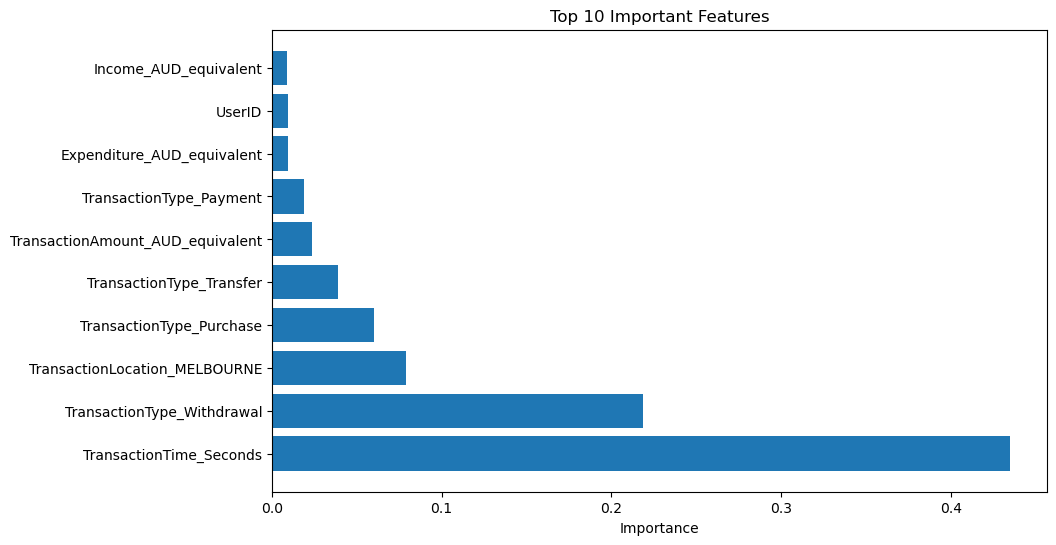

In [58]:
import matplotlib.pyplot as plt

# Get feature importances from the RandomForest model
importances = rfr.feature_importances_

# Create a DataFrame to display features and their importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'].head(10), feature_importance_df['Importance'].head(10))
plt.xlabel('Importance')
plt.title('Top 10 Important Features')
plt.show()


In [59]:
train_df['TransactionTime_hours'] = (train_df['TransactionTime_Seconds'] // 3600) % 24

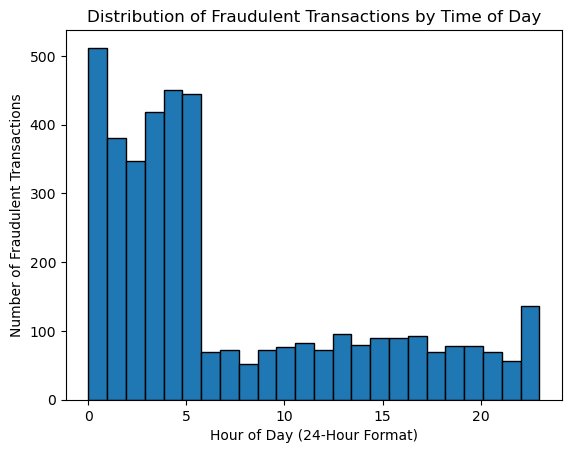

In [60]:
fraud_times = train_df[df['IsFraud'] == 1]['TransactionTime_hours']
plt.hist(fraud_times, bins=24, edgecolor='black')
plt.title('Distribution of Fraudulent Transactions by Time of Day')
plt.xlabel('Hour of Day (24-Hour Format)')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


### Model 2: XGBoost

In [61]:
import xgboost as xgb
from xgboost import XGBClassifier

In [62]:
print(X.head())

   UserID  Age  EducationLevel  NumDependents  MerchantID   Latitude  \
0      70   37               0              3           5 -31.840233   
1    3386   34               1              4           1 -37.020100   
2    2971   25               2              2           7 -31.840233   
3    2925   25               1              3           0 -37.020100   
4    2339   38               1              4           0 -37.020100   

    Longitude  Terrorism  UserTenure  Gender_Female  ...  \
0  145.612793      False         113              1  ...   
1  144.964600      False         104              0  ...   
2  145.612793      False         105              0  ...   
3  144.964600      False          70              0  ...   
4  144.964600      False          27              0  ...   

   Domain_only_disposable.com  Domain_only_gmail.com  Domain_only_outlook.com  \
0                           1                      0                        0   
1                           0               

In [ ]:
# # convert data to DMatrix

# dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
# dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [1]:
from imblearn.over_sampling import SMOTE

In [63]:
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

# 5. Splitting Data for Training and Testing

# We'll split the data into training and validation sets using stratified split to preserve class ratios
Xgb_X_train, Xgb_X_val, Xgb_y_train, Xgb_y_val = train_test_split(X_res, y_res, test_size=0.3, stratify=y_res, random_state=22)

# Initializing XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=100,  # Number of trees in the ensemble
    max_depth=6,  # Maximum depth of each tree
    learning_rate=0.1,  # Learning rate
    subsample=0.8,  # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    scale_pos_weight=1  # Controls the balance of positive and negative weights
)

In [64]:
# train model
xgb_model.fit(Xgb_X_train, Xgb_y_train)

# predict values
Xgb_y_pred = xgb_model.predict(Xgb_X_val)

print(classification_report(Xgb_y_val, Xgb_y_pred))

conf_matrix = confusion_matrix(Xgb_y_val, Xgb_y_pred)
print(conf_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2081
           1       1.00      1.00      1.00      2082

    accuracy                           1.00      4163
   macro avg       1.00      1.00      1.00      4163
weighted avg       1.00      1.00      1.00      4163

[[2079    2]
 [   6 2076]]
